In [1]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

import gzip
import math
import os
import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function
import keras
from keras import backend as K
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.models import Sequential


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
 
def read_mnist_image(fname, num_imgs, img_sz):
    
    assert(os.path.exists(fname))
    
    f = gzip.open(fname, 'r')
    f.read(16)
    
    buf  = f.read(img_sz * img_sz * num_imgs)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_imgs, img_sz, img_sz, 1)

    return data


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
 
def read_mnist_label(fname, n):
    
    assert(os.path.exists(fname))

    arr = np.zeros(shape=(n, 1))
    arr = np.zeros(shape=(n, 1))
    
    f = gzip.open(fname, 'rb')
    f.read(8)

    for i in range(0,n):   
        
        buf   = f.read(1)
        label = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        
        arr[i] = label

    return arr


Using TensorFlow backend.


In [6]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

n_events_train = 50000
n_events_test  = 10000
categories     = 10

f_train_data  = '/home/dbarge/.mnist/train-images-idx3-ubyte.gz'
f_train_truth = '/home/dbarge/.mnist/train-labels-idx1-ubyte.gz'
f_test_data   = '/home/dbarge/.mnist/t10k-images-idx3-ubyte.gz'
f_test_truth  = '/home/dbarge/.mnist/t10k-labels-idx1-ubyte.gz'

train_data      = read_mnist_image(f_train_data , n_events_train, 28)
train_truth     = read_mnist_label(f_train_truth, n_events_train)
test_data       = read_mnist_image(f_test_data  , n_events_test, 28)
test_truth      = read_mnist_label(f_test_truth , n_events_test)
cat_train_truth = keras.utils.to_categorical(train_truth, categories)
cat_test_truth  = keras.utils.to_categorical(test_truth , categories)

train_data /= 255.0
test_data  /= 255.0

print()
print("Train:")
print("   Data input shape: {0}".format(train_data.shape))
print("   Label shape:      {0}".format(cat_train_truth.shape))
print()
print("Test:")
print("   Data input shape: {0}".format(test_data.shape))
print("   Label shape:      {0}".format(cat_test_truth.shape))
print()



Train:
   Data input shape: (50000, 28, 28, 1)
   Label shape:      (50000, 10)

Test:
   Data input shape: (10000, 28, 28, 1)
   Label shape:      (10000, 10)



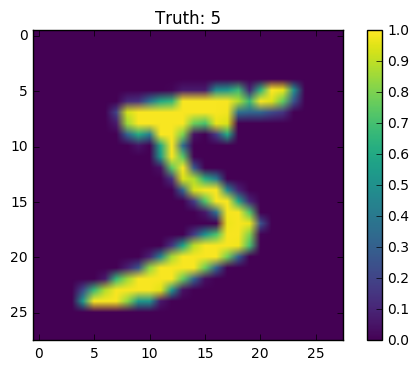

In [7]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

for idx in range(0, 1):
    
    plt.figure()
    plt.imshow(train_data[idx,:].squeeze(), cmap=plt.get_cmap('viridis'))
    plt.title("Truth: {0:01d}".format(int(train_truth[idx,0])))
    plt.colorbar()
    plt.show()



In [8]:

#------------------------------------------------------------------------------
# Model - Conv2D Regression
#    Cost: MSE
#    Activation: Sigmoid
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
# Model - Conv2D Classification
#------------------------------------------------------------------------------

img_size    = 28
kernel_size = 3

model = Sequential()
model.add(
    Conv2D(
        input_shape=(img_size, img_size, 1),
        filters=32,
        kernel_size=(kernel_size, kernel_size),
        strides=(1, 1),
        activation='relu'
    )
)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(
    Conv2D(
        filters=64,
        kernel_size=(kernel_size, kernel_size), 
        activation='relu'
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(categories, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),
    metrics=['accuracy']
)

print("Ready")


Ready


In [ ]:

#------------------------------------------------------------------------------
# Train
#------------------------------------------------------------------------------

print("\nTraining...\n")


hist = model.fit(
    train_data,
    cat_train_truth,
    verbose=1,
    batch_size=128,
    epochs=10,
    validation_data=(test_data, cat_test_truth)
)

score = model.evaluate(test_data, cat_test_truth, verbose=0)

print()
print('Test loss:     {0:.4f}'.format(score[0]))
print('Test accuracy: {0:.4f}'.format(score[1]))
print('\nDone.\n')



Training...

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 1024/50000 [..............................] - ETA: 1:36 - loss: 2.1727 - acc: 0.2686

In [ ]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
